### --------- GOAL: Predict the housing price using various factors related to a house----------------

### Import Statements

In [1]:
#Import Statements

# Data Analysis libraries
import pandas as pd
import numpy as np

# Data Visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Machine Learning libraries
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

#Itertools for cartesian Product of PCA and MCA
import itertools

#Linear Regression and Ridge
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge


#Dimension Reduction for PCA and MCA
from sklearn.decomposition import PCA
import prince

#Grid Search and Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

#Gower Distance
import gower

#K-Mediods
from pyclustering.cluster.kmedoids import kmedoids

#NMI : Normalized Mutual Info
from sklearn.metrics.cluster import normalized_mutual_info_score

### Loading the Data

In [2]:
# Load data set
data = pd.read_csv('train.csv')
data = data.drop('Id', axis = 1)

In [3]:
print("About the housing dataset:")
print("----------------------------------------------------------------------------------------------")
print("Number of rows in the dataset = {} \nNumber of columns in the dataset = {}".format(data.shape[0],data.shape[1]))

About the housing dataset:
----------------------------------------------------------------------------------------------
Number of rows in the dataset = 1460 
Number of columns in the dataset = 80


### Data Cleaning

In [4]:
# Remove columns that have too many missing values
data = data.drop(data.columns[data.isnull().sum() > 30], axis = 1)

# Remove missing values
data.dropna(inplace = True)

In [5]:
data.head()

,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [6]:
print("After removing Null values:")
print("-------------------------------------------")
print("Number of rows in the dataset = {} \nNumber of columns in the dataset = {}".format(data.shape[0],data.shape[1]))

After removing Null values:
-------------------------------------------
Number of rows in the dataset = 1451 
Number of columns in the dataset = 64


## Part I: Dimension Reduction

Principal Component Analysis(PCA) is applied to numerical features.

Multiple Correspondence Analysis(MCA) is applied to categorical data.

#### Setting up X and Y variables

In [7]:
X = data.drop('SalePrice', axis = 1)
y = data.SalePrice

In [8]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1451 entries, 0 to 1459
Data columns (total 63 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1451 non-null   int64  
 1   MSZoning       1451 non-null   object 
 2   LotArea        1451 non-null   int64  
 3   Street         1451 non-null   object 
 4   LotShape       1451 non-null   object 
 5   LandContour    1451 non-null   object 
 6   Utilities      1451 non-null   object 
 7   LotConfig      1451 non-null   object 
 8   LandSlope      1451 non-null   object 
 9   Neighborhood   1451 non-null   object 
 10  Condition1     1451 non-null   object 
 11  Condition2     1451 non-null   object 
 12  BldgType       1451 non-null   object 
 13  HouseStyle     1451 non-null   object 
 14  OverallQual    1451 non-null   int64  
 15  OverallCond    1451 non-null   int64  
 16  YearBuilt      1451 non-null   int64  
 17  YearRemodAdd   1451 non-null   int64  
 18  RoofStyl

The data types of the columns are object, int64, float64

The columns with object data type are categorical in nature

The columns with int64 data type are numerical in nature

MasVnrArea is the only column in float64 data type

#### Converting data types

In [9]:
#Year,month columns are listed as int64. 
#But for this project, all columns with year,month values will be considered as categorical vaiables.
#MasVnrArea is listed as a float64.
#As there are no decimal values in this column, MasVnrArea will be converted to int datatype.

X[['YearBuilt', 'YearRemodAdd', 'MoSold', 'YrSold']] = X[['YearBuilt', 'YearRemodAdd', 'MoSold', 'YrSold']].astype(dtype = 'object')
X['MasVnrArea'] = X['MasVnrArea'].astype(np.int64)

In [10]:
#Checking if datatypes are updated
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1451 entries, 0 to 1459
Data columns (total 63 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MSSubClass     1451 non-null   int64 
 1   MSZoning       1451 non-null   object
 2   LotArea        1451 non-null   int64 
 3   Street         1451 non-null   object
 4   LotShape       1451 non-null   object
 5   LandContour    1451 non-null   object
 6   Utilities      1451 non-null   object
 7   LotConfig      1451 non-null   object
 8   LandSlope      1451 non-null   object
 9   Neighborhood   1451 non-null   object
 10  Condition1     1451 non-null   object
 11  Condition2     1451 non-null   object
 12  BldgType       1451 non-null   object
 13  HouseStyle     1451 non-null   object
 14  OverallQual    1451 non-null   int64 
 15  OverallCond    1451 non-null   int64 
 16  YearBuilt      1451 non-null   object
 17  YearRemodAdd   1451 non-null   object
 18  RoofStyle      1451 non-null

#### Setting up Categorical and Numerical Features

In [11]:
#All categorical features are of dtype object while the quant features are int64. 
cat = X.select_dtypes(include=['object']).dtypes 
num = X.select_dtypes(exclude =['object']).dtypes

In [12]:
print("Distribution of columns in the dataset:")
print("---------------------------------------------------------------------------------")
print("Number of categorical columns in X = {}".format(cat.shape[0]))
print("Number of numerical columns in X = {}".format(num.shape[0]))

Distribution of columns in the dataset:
---------------------------------------------------------------------------------
Number of categorical columns in X = 33
Number of numerical columns in X = 30


#### Splitting the data into 3 pieces (training, validation, testing).

In [13]:
#Splitting data into train and test. 80% train and 20% test. 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state= 23)

#Splitting train data into training and validation.  60% train, 20%valid, 20%test

X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size = 0.25, random_state = 23)


In [14]:
print("Dataset splits:")
print("---------------------------------------------------------------------------------------")
print("Total rows in X = {}".format(X.shape[0]))
print("Number of rows in X's Train split = {} , Split Percentage = {:.2f}%".format(X_train.shape[0],(X_train.shape[0]/X.shape[0])*100))
print("Number of rows in X's Valid Split = {} , Split Percentage = {:.2f}%".format(X_valid.shape[0],(X_valid.shape[0]/X.shape[0])*100))
print("Number of rows in X's Test split = {} , Split Percentage = {:.2f}%".format(X_test.shape[0],(X_test.shape[0]/X.shape[0])*100))

Dataset splits:
---------------------------------------------------------------------------------------
Total rows in X = 1451
Number of rows in X's Train split = 870 , Split Percentage = 59.96%
Number of rows in X's Valid Split = 290 , Split Percentage = 19.99%
Number of rows in X's Test split = 291 , Split Percentage = 20.06%


#### Setting up Categorical and Numerical Features in the split data

In [15]:
#Separate numerical and categorical features into different datasets

#Filter out categorical features from the dataset splits
X_train_cat = X_train[cat.index]
X_valid_cat = X_valid[cat.index]
X_test_cat = X_test[cat.index]

#Filter out numerical features from the dataset splits
X_train_num = X_train[num.index]
X_valid_num = X_valid[num.index]
X_test_num = X_test[num.index]

#### Balancing Levels

In [16]:
#Checking the unique values in X train's categorical columns
X_train_cat.nunique()

MSZoning           5
Street             2
LotShape           4
LandContour        4
Utilities          2
LotConfig          5
LandSlope          3
Neighborhood      25
Condition1         9
Condition2         4
BldgType           5
HouseStyle         8
YearBuilt        103
YearRemodAdd      61
RoofStyle          5
RoofMatl           7
Exterior1st       13
Exterior2nd       15
MasVnrType         4
ExterQual          4
ExterCond          5
Foundation         6
Heating            5
HeatingQC          5
CentralAir         2
Electrical         5
KitchenQual        4
Functional         6
PavedDrive         3
MoSold            12
YrSold             5
SaleType           8
SaleCondition      6
dtype: int64

In [17]:
# checking the unique values in X validation categorical data frame 
X_valid_cat.nunique()

MSZoning          4
Street            2
LotShape          4
LandContour       4
Utilities         1
LotConfig         4
LandSlope         3
Neighborhood     24
Condition1        8
Condition2        6
BldgType          5
HouseStyle        8
YearBuilt        89
YearRemodAdd     56
RoofStyle         6
RoofMatl          4
Exterior1st      10
Exterior2nd      13
MasVnrType        4
ExterQual         4
ExterCond         4
Foundation        5
Heating           5
HeatingQC         4
CentralAir        2
Electrical        3
KitchenQual       4
Functional        5
PavedDrive        3
MoSold           12
YrSold            5
SaleType          8
SaleCondition     6
dtype: int64

We see that X train and X validation do not have the same unique categories in their columns.

For eg: MSZoning has 5 unique categories in Train split whereas MSZoning has only 4 unique categories in Validation split

Unless the unique categories (levels) in each column are not balanced, we will not be able to compare them.

In [18]:
# to make sure the training,validation and testing categorical variables has same number of levels
# keeping the coulmns with same number of categories
keep = [] 

for n in X_train_cat.columns:
    if X_train_cat.nunique()[n] == X_test_cat.nunique()[n] == X_valid_cat.nunique()[n]:
        keep.append(True)
    else:
        keep.append(False)

X_train_cat = X_train_cat[X_train_cat.columns[keep]]
X_valid_cat = X_valid_cat[X_valid_cat.columns[keep]]
X_test_cat = X_test_cat[X_test_cat.columns[keep]]

In [19]:
# making sure the classes are the same in each categorical variable column
keep_col = []

for i in range(len(X_train_cat.columns)):
    if all(np.sort(X_train_cat.iloc[:,i].unique()) == np.sort(X_test_cat.iloc[:,i].unique())) and all(np.sort(X_valid_cat.iloc[:,i].unique()) == np.sort(X_test_cat.iloc[:,i].unique())):
        keep_col.append(True)
    else:
        keep_col.append(False)
        
X_train_cat = X_train_cat[X_train_cat.columns[keep_col]]
X_valid_cat = X_valid_cat[X_valid_cat.columns[keep_col]]
X_test_cat = X_test_cat[X_test_cat.columns[keep_col]]

In [20]:
print("After balancing levels:")
print("--------------------------------------------------------------------")
print("Number of columns in X_train's categorical split = {}".format(X_train_cat.shape[1]))
print("Number of columns in X_valid's categorical split = {}".format(X_valid_cat.shape[1]))
print("Number of columns in X_test's categorical split = {}".format(X_test_cat.shape[1]))

After balancing levels:
--------------------------------------------------------------------
Number of columns in X_train's categorical split = 14
Number of columns in X_valid's categorical split = 14
Number of columns in X_test's categorical split = 14


#### Scaling Numerical Features

In [21]:
#Scaling the traininig & validation dataset
# we need to scale the data first before we do any sort of transformation with PCA. We chose to use standardscaler. 
scaler = StandardScaler()
scaler.fit(X_train_num)
X_train_num_scaled = pd.DataFrame(scaler.transform(X_train_num), index = X_train_num.index)
X_valid_num_scaled = pd.DataFrame(scaler.transform(X_valid_num), index = X_valid_num.index)

#### Hyper parameter Tuning

In [22]:
pca_n = range(2,18)
mca_n = range(2,15)

#cartesian product, equivalent to a nested for-loop
hyperparameter_pairs = list(itertools.product(pca_n, mca_n)) 

rmse_results = [] # Storing the rmse results
rmse_percentage = [] #Storing rmse percentage results

for pairs in hyperparameter_pairs:
    
    #Apply PCA on the numerical features in Train split
    pca = PCA(n_components = pairs[0], random_state = 23)
    X_train_num_scaled_transform = pd.DataFrame(pca.fit_transform(X_train_num_scaled),index = X_train_num_scaled.index)
    
    #Apply MCA on the categorical features in Train split
    mca = prince.MCA(n_components = pairs[1], random_state = 23)
    X_train_cat_transform = pd.DataFrame(mca.fit_transform(X_train_cat), index = X_train_cat.index)
    
    #Combine PCA and MCA training together
    X_train_cn_transform = pd.concat([X_train_cat_transform, X_train_num_scaled_transform], axis = 1)

    #Fit LinearRegression model using combined training data
    linreg = LinearRegression()
    linreg.fit(X_train_cn_transform, y_train)    
    
    #PCA transform on numerical validation data split
    X_valid_num_scaled_transform = pd.DataFrame(pca.transform(X_valid_num_scaled),index = X_valid_num_scaled.index)
    
    #MCA TRANSFORM on categorical validation data split
    X_valid_cat_transform = pd.DataFrame(mca.transform(X_valid_cat), index = X_valid_cat.index)
    
    #Combine PCA and MCA validation together
    X_valid_cn_transform = pd.concat([X_valid_cat_transform, X_valid_num_scaled_transform], axis = 1)
    
    #Predicting y
    y_pred = linreg.predict(X_valid_cn_transform)
    
    #Calculating RMSE
    rmse_results.append(np.sqrt(metrics.mean_squared_error(y_valid,y_pred)))
    
    #Calculating RMSE Percentage
    rmse_percentage.append((np.sqrt(np.mean(np.square((y_valid - y_pred) / y_valid)))) * 100)

In [23]:
accuracy = []
accuracy_name = []
best_hyp = hyperparameter_pairs[np.argmin(rmse_results)]
print("Tuned Hyper parameters: ")
print("--------------------------------------------------------------------")
print("The best hyperparameters to use is: PCA: {}, MCA: {}".format(best_hyp[0],best_hyp[1]))
print("RMSE on the validation dataset using the hyperparameter pair: {} ".format(min(rmse_results)))
Accuracy_percentage_Train = 100 - min(rmse_percentage)
accuracy_name.append("Dimension Reduced Validation Accuracy")
accuracy.append(Accuracy_percentage_Train)
print("Accuracy Percentage on the validation dataset using the hyperparameter pair: {:.2f} % ".format(Accuracy_percentage_Train))

Tuned Hyper parameters: 
--------------------------------------------------------------------
The best hyperparameters to use is: PCA: 16, MCA: 14
RMSE on the validation dataset using the hyperparameter pair: 33531.33666504516 
Accuracy Percentage on the validation dataset using the hyperparameter pair: 80.93 % 


#### Applying the best hyper parameters to Linear Regression Model and calculating Accuracy (RMSE) in Test Set

#### Combining training and validation data 

In [24]:
#Combine training and validation categorical features
X_tv_cat = pd.concat([X_train_cat, X_valid_cat], axis = 0)
#Combine training and validation numerical features
X_tv_num = pd.concat([X_train_num, X_valid_num], axis = 0) 

#### Scaling Numerical Features in the combined tv (train) dataset

In [25]:
#Scale Numerical data for tv(training and validation) and test datasets
scaler.fit(X_tv_num)
X_tv_num_scaled = pd.DataFrame(scaler.transform(X_tv_num), index = X_tv_num.index)
X_test_num_scaled = pd.DataFrame(scaler.transform(X_test_num), index = X_test_num.index) 

#### Applying PCA on Numerical Features with tuned hyper parameter for PCA

In [26]:
#PCA on tv data
pca = PCA(n_components = best_hyp[0], random_state = 23)

#PCA transform on numerical scaled tv data 
X_tv_num_scaled_transform = pd.DataFrame(pca.fit_transform(X_tv_num_scaled),index = X_tv_num_scaled.index)

#### Applying MCA on Categorical Features with tuned hyper parameter for MCA

In [27]:
#MCA on tv data
mca = prince.MCA(n_components = best_hyp[1], random_state = 23)

#MCA tranform on categorical tv data
X_tv_cat_transform = pd.DataFrame(mca.fit_transform(X_tv_cat), index = X_tv_cat.index)

#### Combining PCA and MCA tranformed data with reduced dimensions

In [28]:
#Combine PCA and MCA together on tv data
X_tv_cn_transform = pd.concat([X_tv_cat_transform, X_tv_num_scaled_transform ], axis = 1)

#### Applying Linear Regression on Reduced dimension data

In [29]:
#Fit LinearRegression model
y_tv = pd.concat([y_train, y_valid])
linreg = LinearRegression()
linreg.fit(X_tv_cn_transform, y_tv)

LinearRegression()

#### Applying PCA on Test Numerical Features

In [30]:
#PCA TRANSFORM test data
X_test_num_scaled_transform = pd.DataFrame(pca.transform(X_test_num_scaled),index = X_test_num_scaled.index)

#### Applying MCA on Test Categorical Features

In [31]:
#MCA TRANSFORM test data
X_test_cat_transform = pd.DataFrame(mca.transform(X_test_cat), index = X_test_cat.index)

#### Combining Reduced Dimension Test Categorical and Numerical data

In [32]:
# Combine categorical and numerical test data
X_test_cn_transform = pd.concat([X_test_cat_transform, X_test_num_scaled_transform], axis = 1)

#### Calculating RMSE

In [33]:
#Calculate RMSE
print("Accuracy of Test Data with Tuned Hyper parameters:")
print("------------------------------------------------------------------------")
y_pred = linreg.predict(X_test_cn_transform)
RMSE_SCORE = (np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
Accuracy_Percentage_Test = 100 - ((np.sqrt(np.mean(np.square((y_test - y_pred) / y_test)))) * 100)
accuracy_name.append("Dimension Reduced Test Accuracy")
accuracy.append(Accuracy_Percentage_Test)
print("RMSE for Test Data using hyperparameter pair = {}".format(RMSE_SCORE))
print("Accuracy Percentage for Test Data using hyperparameter pair = {:.2f} %".format(Accuracy_Percentage_Test))


Accuracy of Test Data with Tuned Hyper parameters:
------------------------------------------------------------------------
RMSE for Test Data using hyperparameter pair = 50022.363345618185
Accuracy Percentage for Test Data using hyperparameter pair = 73.17 %


### Performing Ridge Regression on Original Dataset

#### Forming Dummy variables for categorical train and test data

In [34]:
#Forming Dummy variables for categorical variables
X_tv_cat_dummies = pd.get_dummies(X_tv_cat, drop_first = True)
X_test_cat_dummies = pd.get_dummies(X_test_cat, drop_first = True)

#### Combining Dummy variable columns with Numerical features in train and test data

In [35]:
#Combining categorical and numerical datasets
X_tv_cdn = pd.concat([X_tv_cat_dummies, X_tv_num], axis = 1)
X_test_cdn = pd.concat([X_test_cat_dummies, X_test_num], axis = 1)

#### Performing Grid Search to tune parameters

In [36]:
#Setting up pipeline for GridSearch
piper = Pipeline(steps = [('scale', StandardScaler()),('ridge', Ridge())])

In [37]:
#Setting up parameters for GridSearch
params = {'ridge__alpha': np.logspace(-10,10,21),
          'ridge__max_iter': [5,10,20,30]
         } 

In [38]:
#GridSearch and fitting Ridge Regression Model
grid_search_ridge = GridSearchCV(piper, params, cv = 10, scoring = 'neg_mean_squared_error', n_jobs = -1) 
grid_search_ridge.fit(X_tv_cdn, y_tv)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('scale', StandardScaler()),
                                       ('ridge', Ridge())]),
             n_jobs=-1,
             param_grid={'ridge__alpha': array([1.e-10, 1.e-09, 1.e-08, 1.e-07, 1.e-06, 1.e-05, 1.e-04, 1.e-03,
       1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03, 1.e+04, 1.e+05,
       1.e+06, 1.e+07, 1.e+08, 1.e+09, 1.e+10]),
                         'ridge__max_iter': [5, 10, 20, 30]},
             scoring='neg_mean_squared_error')

In [39]:
print("Best parameters for Ridge Regression are: ",grid_search_ridge.best_params_)


Best parameters for Ridge Regression are:  {'ridge__alpha': 10.0, 'ridge__max_iter': 5}


#### Accuracy Calculation of Ridge Regression

In [40]:
print("Accuracy from Ridge Regression on Original Dataset without Dimension Reduction:")
print("------------------------------------------------------------")
y_pred = grid_search_ridge.predict(X_test_cdn)
RMSE_Ridge_Score = (np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
print("RMSE for Ridge regression model on Original Dataset = {}".format(RMSE_Ridge_Score))
Accuracy_Percentage_Ridge = 100 - ((np.sqrt(np.mean(np.square((y_test - y_pred) / y_test)))) * 100)
print("Accuracy Percentage for Test Data using hyperparameter pair = {:.2f} %".format(Accuracy_Percentage_Ridge))
accuracy_name.append("Ridge Accuracy on Original Dataset")
accuracy.append(Accuracy_Percentage_Ridge)


Accuracy from Ridge Regression on Original Dataset without Dimension Reduction:
------------------------------------------------------------
RMSE for Ridge regression model on Original Dataset = 47811.84902753324
Accuracy Percentage for Test Data using hyperparameter pair = 73.41 %


### Observations

In [41]:
print("\t \t ACCURACY COMPARISON")
print("------------------------------------------------------------------------------------")
print ("{:<40} |\t{:<20}\t|".format('DATASET','ACCURACY'))
print("------------------------------------------------------------------------------------")  
combined = list(zip(accuracy_name, accuracy))

for name, per in combined:
    print("{:<40} |\t{:<20}\t|".format(name, per))
       

	 	 ACCURACY COMPARISON
------------------------------------------------------------------------------------
DATASET                                  |	ACCURACY            	|
------------------------------------------------------------------------------------
Dimension Reduced Validation Accuracy    |	80.93261966814194   	|
Dimension Reduced Test Accuracy          |	73.16621495158472   	|
Ridge Accuracy on Original Dataset       |	73.40864518327284   	|


[Text(0.5, 1.0, 'ACCURACY COMPARISON OF MODELS')]

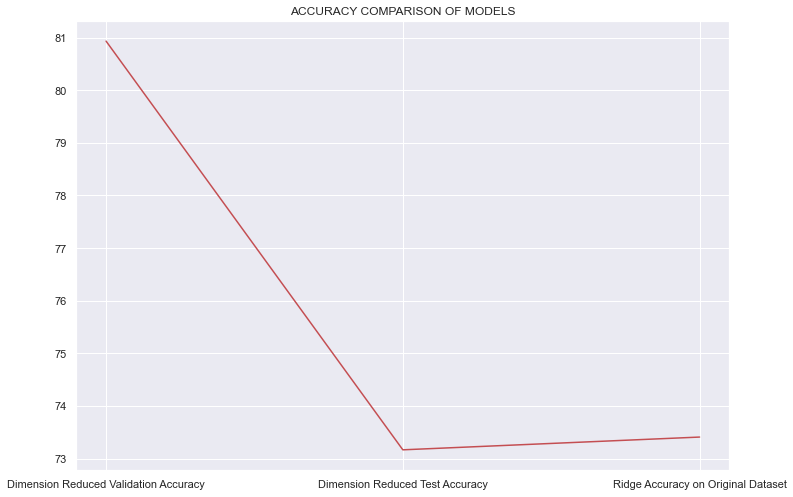

In [42]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set_style('darkgrid')
sns.lineplot(x=accuracy_name,y=accuracy,color='r').set(title='ACCURACY COMPARISON OF MODELS')

### Findings:

##### After applying dimension reduction, training accuracy was 81%, test accuracy was 73.2%. 
##### Number of components were reduced while tuning hyper parameters to avoid overfitting.
##### Without dimension reduction, accuracy is 73.4%. This is slightly better than accuracy with dimension reduction. Although, it could have been caused by overfitting.


## Part II: Clustering Analysis

- While we perform dimension reduction separately for numerical and categorical data, there are methods that can perform clustering analysis with numerical and categorical data combined. 
- As usual, the most important aspect is the distance metric to use. 
- For mixed data types, researchers have proposed to use the Gower distance. 
- The Gower distance is essentially a special distance metric that measures numerical data and categorical data separately, then combine them to form a distance calculation. 

## Steps:
    
1. Split the X and y variables from the dataset.
2. Compute the Gower distance of the full predictors set, i.e. no train/test split.
3. Apply K-medoids using the gower distance matrix as input. The k-medoid function allows the user to input a distance matrix instead of the raw data.
4. Compare the clustering result with the ’ground truth’.

     4a. Clustering result will only tell you which observations belong to cluster k.So first create an array that records the cluster membership of each observation.
     
     4b. Bin the response variable (of the original data set) into the number of categories you used for k-medoids (for example, if you choose 5 clusters, bin the response into 5 groups). Use the pandas.qcut function so each group has roughly the same number of observations.
     
     4c. Compute the normalized mutual information (NMI) between your clustering results and the binned categories. (NMI is a metric to measure clustering performance. 

#### Step 1: Split the X and y variables from the dataset.

In [43]:
X = data.drop('SalePrice', axis = 1)
y = data['SalePrice']

#### Step 2: Compute the Gower distance of the full predictors set, i.e. no train/test split.

In [44]:
#get the gower distance matrix
gower_matrix = gower.gower_matrix(X)

In [45]:
gower_matrix

array([[0.        , 0.24024484, 0.03944052, ..., 0.19145243, 0.25093865,
        0.20125039],
       [0.24024484, 0.        , 0.24959742, ..., 0.24499281, 0.19383048,
        0.1789145 ],
       [0.03944052, 0.24959742, 0.        , ..., 0.20383762, 0.2743255 ,
        0.22117272],
       ...,
       [0.19145243, 0.24499281, 0.20383762, ..., 0.        , 0.25380814,
        0.25413764],
       [0.25093865, 0.19383048, 0.2743255 , ..., 0.25380814, 0.        ,
        0.16829133],
       [0.20125039, 0.1789145 , 0.22117272, ..., 0.25413764, 0.16829133,
        0.        ]], dtype=float32)

#### Step 3: Apply K-medoids using the gower distance matrix as input. 

In [46]:
#Initialize: select k random points out of the n data points as the medoids.
cluster_list = []
k = 10
cluster_list.append(k)
np.random.seed(23)
# Setting random initial medoids.
initial_kmedoids = np.random.choice(range(len(y)), k)
print(initial_kmedoids)

[ 595  742 1064  950   31  237  347   39  665 1030]


In [47]:
# Creating instance of K-Medoids algorithm.
# create K-Medoids algorithm for processing distance matrix instead of points
# Distance matrix can be used instead of sequence of points to increase performance and for that purpose parameter 'data_type' should be used:
    
kmedoids_instance = kmedoids(gower_matrix, initial_kmedoids, data_type='distance_matrix')

In [48]:
#Run cluster analysis and obtain results.
kmedoids_instance.process() 

#Returns list of allocated clusters, each cluster contains indexes of objects in list of data.
clusters = kmedoids_instance.get_clusters()

#Returns list of medoids of allocated clusters represented by indexes from the input data.
medoids = kmedoids_instance.get_medoids()

In [49]:
# Showing allocated clusters.
print("Cluster output example:\n --------------------------------------------\n",clusters[0])

Cluster output example:
 --------------------------------------------
 [5, 9, 48, 61, 88, 92, 93, 110, 142, 149, 163, 165, 166, 177, 182, 184, 187, 202, 238, 249, 266, 288, 291, 334, 344, 351, 353, 360, 370, 385, 386, 389, 393, 401, 405, 406, 417, 430, 438, 448, 458, 462, 466, 501, 507, 519, 521, 527, 533, 541, 544, 555, 560, 561, 577, 582, 584, 594, 597, 605, 612, 633, 648, 650, 654, 656, 660, 678, 695, 708, 720, 740, 746, 764, 769, 785, 798, 804, 811, 836, 884, 887, 918, 935, 948, 952, 962, 1025, 1029, 1032, 1043, 1065, 1066, 1079, 1086, 1092, 1108, 1112, 1116, 1117, 1138, 1139, 1141, 1162, 1167, 1171, 1174, 1179, 1216, 1255, 1267, 1271, 1275, 1276, 1277, 1300, 1318, 1323, 1324, 1341, 1344, 1352, 1369, 1375, 1376, 1388, 1389, 1390, 1402, 1431, 1439, 1440]


In [50]:
#Cluster Visualization:
print("Clusters and Mediods created:")
print("-------------------------------------------------------------------------------")
cluster_df = pd.DataFrame(list(zip(clusters, medoids)),columns =['Indexes', 'medoids'])
cluster_df.reset_index(inplace=True)
cluster_df = cluster_df.rename(columns = {'index':'cluster'})
print(cluster_df,'\n-------------------------------------------------------------------------------\n')

Clusters and Mediods created:
-------------------------------------------------------------------------------
   cluster                                            Indexes  medoids
0        0  [5, 9, 48, 61, 88, 92, 93, 110, 142, 149, 163,...      836
1        1  [10, 12, 16, 37, 40, 55, 59, 66, 71, 73, 75, 7...      881
2        2  [2, 3, 4, 35, 46, 50, 57, 65, 72, 84, 85, 86, ...      168
3        3  [47, 56, 87, 105, 115, 145, 157, 158, 180, 183...      452
4        4  [24, 31, 33, 36, 41, 42, 43, 49, 53, 74, 76, 8...     1156
5        5  [11, 13, 20, 58, 62, 112, 151, 167, 178, 196, ...       13
6        6  [7, 70, 80, 100, 101, 109, 118, 126, 130, 152,...      982
7        7  [8, 15, 21, 30, 51, 63, 77, 79, 104, 108, 121,...     1142
8        8  [1, 14, 17, 19, 23, 26, 28, 29, 38, 39, 44, 52...     1242
9        9  [0, 6, 18, 22, 25, 27, 32, 34, 45, 60, 64, 67,...      216 
-------------------------------------------------------------------------------



In [51]:
# Checking the number of datapoints in each cluster
for i in range(0,k):
    print("Number of Datapoints in cluster {} is: {}".format(i,len(clusters[i])))

Number of Datapoints in cluster 0 is: 132
Number of Datapoints in cluster 1 is: 218
Number of Datapoints in cluster 2 is: 195
Number of Datapoints in cluster 3 is: 75
Number of Datapoints in cluster 4 is: 149
Number of Datapoints in cluster 5 is: 98
Number of Datapoints in cluster 6 is: 94
Number of Datapoints in cluster 7 is: 123
Number of Datapoints in cluster 8 is: 173
Number of Datapoints in cluster 9 is: 194


#### Step 4a: Clustering result will only tell you which observations belong to cluster k.So first create an array that records the cluster membership of each observation.

In [52]:
# create an array that records the cluster membership of each observation.
y_assignments = np.zeros(len(y))
for i in range(1,k):
    y_assignments[clusters[i]] = i
    
print(y_assignments)

[9. 8. 2. ... 2. 8. 1.]


In [53]:
# Creating a dataframe for better visualization
assign = pd.DataFrame(list(zip(y_assignments,y)),columns =['y_assignments', 'y'])

print(assign)

      y_assignments       y
0               9.0  208500
1               8.0  181500
2               2.0  223500
3               2.0  140000
4               2.0  250000
...             ...     ...
1446            2.0  175000
1447            1.0  210000
1448            2.0  266500
1449            8.0  142125
1450            1.0  147500

[1451 rows x 2 columns]


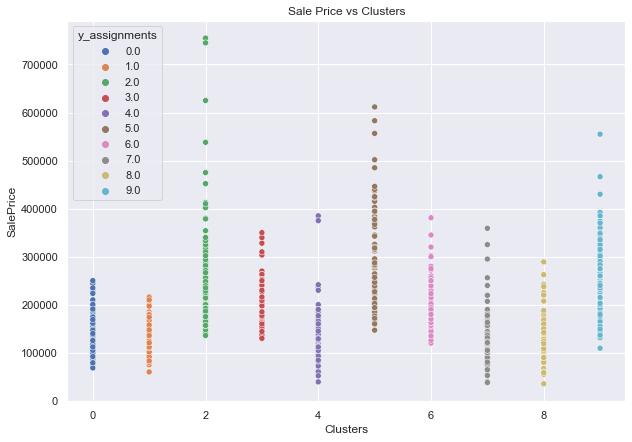

In [54]:
#Plot showing Sale price vs clusters
plt.figure(figsize=(10,7))
sns.scatterplot(data=assign,x='y_assignments',y = 'y',hue = "y_assignments",palette="deep")

plt.title("Sale Price vs Clusters")
plt.xlabel("Clusters")
plt.ylabel("SalePrice")

plt.show()

#### Step 4b: Bin the response variable (of the original data set) into the number of categories you used for k-medoids  

In [55]:
# Bin response variable so each group has roughly the same number of observations.
response_binned = pd.qcut(y, q = k, labels = range(k))
response_binned[:10]

0    7
1    6
2    7
3    3
4    8
5    3
6    9
7    7
8    2
9    1
Name: SalePrice, dtype: category
Categories (10, int64): [0 < 1 < 2 < 3 ... 6 < 7 < 8 < 9]

##### Bins are made on the basis of increasing selling price range 

#### Step 4c: Compute the normalized mutual information (NMI) between your clustering results and the binned categories. 

### Check performance with NMI performance metrics with 10 clusters

In [56]:
#Assign labels to Clusters
#Creating an array for labels with length = number of rows in X
cluster_labels = np.zeros([X.shape[0]], dtype=int)

for i in range(1,k):
    cluster_labels[clusters[i]] = i

cluster_labels 

array([9, 8, 2, ..., 2, 8, 1])

In [57]:
# NMI between clustering results and the binned categories.
nmi_score = []
NMI_1 = normalized_mutual_info_score(response_binned, cluster_labels)
nmi_score.append(NMI_1)
print("Normalized Mutual Information score with {} clusters :{}".format(k,NMI_1))

Normalized Mutual Information score with 10 clusters :0.18428804060392553


### Repeating the same procedure for cluster k = 3

In [58]:
# Randomly sample 3 observations as initial centers.

k = 3
cluster_list.append(k)
np.random.seed(23)
initial_kmedoids = np.random.choice(range(len(y)), k)
print("initial_kmedoids: ",initial_kmedoids)


initial_kmedoids:  [ 595  742 1064]


In [59]:
#Step 3: Apply K-medoids using the gower distance matrix as input. 
kmedoids_instance = kmedoids(gower_matrix, initial_kmedoids, data_type='distance_matrix')

kmedoids_instance.process() #Run cluster analysis and obtain results

medoids = kmedoids_instance.get_medoids() #finding new medoids

clusters = kmedoids_instance.get_clusters()  #finding new clustersdr

print("Medoids:",medoids)


Medoids: [1242, 168, 602]


In [60]:
#Cluster Visualization:
print("Clusters and Mediods created:")
print("-------------------------------------------------------------------------------")
cluster_df = pd.DataFrame(list(zip(clusters, medoids)),columns =['Indexes', 'medoids'])
cluster_df.reset_index(inplace=True)
cluster_df = cluster_df.rename(columns = {'index':'cluster'})
print(cluster_df,'\n-------------------------------------------------------------------------------\n')

Clusters and Mediods created:
-------------------------------------------------------------------------------
   cluster                                            Indexes  medoids
0        0  [1, 8, 9, 10, 12, 14, 15, 16, 17, 19, 21, 23, ...     1242
1        1  [0, 3, 5, 7, 11, 20, 35, 46, 50, 56, 57, 58, 6...      168
2        2  [2, 4, 6, 13, 18, 22, 25, 27, 32, 34, 36, 45, ...      602 
-------------------------------------------------------------------------------



In [61]:
# Checking the number of datapoints in each cluster
for i in range(0,k):
    print("Number of Datapoints in cluster {} is: {}".format(i,len(clusters[i])))

Number of Datapoints in cluster 0 is: 760
Number of Datapoints in cluster 1 is: 358
Number of Datapoints in cluster 2 is: 333


In [62]:
# 4a: first create an array that records the cluster membership of each observation
# Assign labels to Clusters

labels = np.zeros([len(X)], dtype=int)
for i in range(k):
    labels[clusters[i]] = i
print(labels)

[1 0 2 ... 1 0 0]


In [63]:
# 4b: Bin the response variable (of the original data set) into the number of categories you used for k-medoids

bins = pd.qcut(y, k, range(k))
print('response variable binned into {} categories :\n{}'.format(k,bins))

response variable binned into 3 categories :
0       2
1       1
2       2
3       1
4       2
       ..
1455    1
1456    2
1457    2
1458    1
1459    1
Name: SalePrice, Length: 1451, dtype: category
Categories (3, int64): [0 < 1 < 2]


In [64]:
y_assignments = np.zeros(len(y))
for i in range(1,k):
    y_assignments[clusters[i]] = i
    
print(y_assignments)


[1. 0. 2. ... 1. 0. 0.]


In [65]:
# Creating a dataframe for better visualization
assign = pd.DataFrame(list(zip(y_assignments,y)),columns =['y_assignments', 'y'])

print(assign)

      y_assignments       y
0               1.0  208500
1               0.0  181500
2               2.0  223500
3               1.0  140000
4               2.0  250000
...             ...     ...
1446            1.0  175000
1447            0.0  210000
1448            1.0  266500
1449            0.0  142125
1450            0.0  147500

[1451 rows x 2 columns]


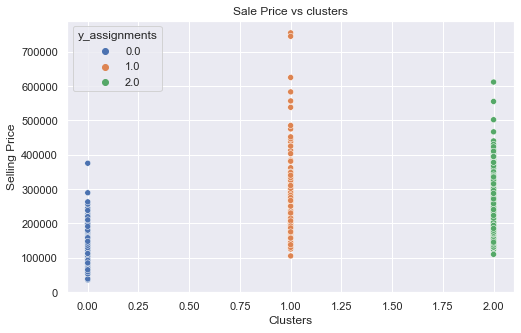

In [66]:
#Plot to show sale price vs 3 clusters
plt.figure(figsize=(8,5))
sns.scatterplot(data=assign,x='y_assignments',y = 'y', hue = "y_assignments",palette="deep")

plt.title("Sale Price vs clusters")
plt.xlabel("Clusters")
plt.ylabel("Selling Price")

plt.show()

In [67]:
# 4c: Compute the normalized mutual information (NMI) between your clustering results and the binned categories.

NMI_new = normalized_mutual_info_score(bins, labels)
nmi_score.append(NMI_new)
print("Normalized Mutual Information score with {} clusters :{}".format(k,NMI_new))

Normalized Mutual Information score with 3 clusters :0.28863032518077514


### Repeating the same procedure for cluster k = 5

In [68]:
# Randomly sample 5 observations as initial centers.

k = 5
cluster_list.append(k)
np.random.seed(23)
initial_kmedoids = np.random.choice(range(len(y)), k)
print("initial_kmedoids: ",initial_kmedoids)


initial_kmedoids:  [ 595  742 1064  950   31]


In [69]:
#Step 3: Apply K-medoids using the gower distance matrix as input. 
kmedoids_instance = kmedoids(gower_matrix, initial_kmedoids, data_type='distance_matrix')

kmedoids_instance.process() #Run cluster analysis and obtain results

medoids = kmedoids_instance.get_medoids() #finding new medoids

clusters = kmedoids_instance.get_clusters()  #finding new clustersdr

print("Medoids:",medoids)
# Showing allocated clusters.
print("Cluster output example:\n --------------------------------------------\n",clusters[0])

Medoids: [602, 1242, 881, 168, 1142]
Cluster output example:
 --------------------------------------------
 [2, 4, 6, 13, 18, 22, 25, 27, 32, 34, 36, 45, 47, 53, 60, 62, 64, 67, 81, 82, 89, 96, 100, 103, 123, 133, 138, 141, 143, 148, 151, 162, 166, 169, 174, 178, 186, 189, 192, 196, 199, 200, 203, 211, 213, 216, 219, 220, 224, 229, 235, 237, 239, 250, 256, 275, 277, 280, 281, 282, 283, 301, 304, 308, 325, 331, 332, 335, 336, 337, 342, 349, 350, 354, 355, 361, 368, 375, 377, 380, 384, 387, 398, 399, 400, 404, 411, 419, 420, 425, 427, 439, 442, 445, 450, 456, 464, 467, 469, 471, 472, 473, 475, 477, 479, 480, 482, 495, 506, 510, 514, 528, 537, 538, 540, 550, 557, 565, 575, 578, 579, 583, 591, 593, 595, 596, 602, 604, 608, 610, 616, 629, 637, 638, 642, 651, 658, 661, 664, 670, 674, 675, 679, 680, 685, 686, 687, 696, 697, 701, 703, 704, 709, 715, 717, 718, 721, 723, 724, 727, 728, 739, 741, 745, 749, 762, 765, 771, 772, 773, 779, 780, 787, 790, 802, 808, 812, 814, 816, 821, 822, 824, 829, 8

In [70]:
#Cluster Visualization:
print("Clusters and Mediods created:")
print("-------------------------------------------------------------------------------")
cluster_df = pd.DataFrame(list(zip(clusters, medoids)),columns =['Indexes', 'medoids'])
cluster_df.reset_index(inplace=True)
cluster_df = cluster_df.rename(columns = {'index':'cluster'})
print(cluster_df,'\n-------------------------------------------------------------------------------\n')

Clusters and Mediods created:
-------------------------------------------------------------------------------
   cluster                                            Indexes  medoids
0        0  [2, 4, 6, 13, 18, 22, 25, 27, 32, 34, 36, 45, ...      602
1        1  [1, 9, 14, 17, 19, 23, 24, 26, 28, 29, 33, 38,...     1242
2        2  [7, 10, 12, 16, 31, 37, 40, 42, 49, 55, 59, 66...      881
3        3  [0, 3, 5, 11, 20, 35, 46, 50, 56, 57, 58, 65, ...      168
4        4  [8, 15, 21, 30, 48, 51, 63, 74, 77, 79, 88, 10...     1142 
-------------------------------------------------------------------------------



In [71]:
# Checking the number of datapoints in each cluster
for i in range(0,k):
    print("Number of Datapoints in cluster {} is: {}".format(i,len(clusters[i])))

Number of Datapoints in cluster 0 is: 313
Number of Datapoints in cluster 1 is: 352
Number of Datapoints in cluster 2 is: 293
Number of Datapoints in cluster 3 is: 319
Number of Datapoints in cluster 4 is: 174


In [72]:
# 4a: first create an array that records the cluster membership of each observation
# Assign labels to Clusters

labels = np.zeros([len(X)], dtype=int)
for i in range(k):
    labels[clusters[i]] = i
print(labels)

[3 1 0 ... 3 1 2]


In [73]:
# 4b: Bin the response variable (of the original data set) into the number of categories you used for k-medoids

bins = pd.qcut(y, k, range(k))
print('response variable binned into {} categories :\n{}'.format(k,bins))

response variable binned into 5 categories :
0       3
1       3
2       3
3       1
4       4
       ..
1455    2
1456    3
1457    4
1458    1
1459    2
Name: SalePrice, Length: 1451, dtype: category
Categories (5, int64): [0 < 1 < 2 < 3 < 4]


In [74]:
y_assignments = np.zeros(len(y))
for i in range(1,k):
    y_assignments[clusters[i]] = i
    
print(y_assignments)


[3. 1. 0. ... 3. 1. 2.]


In [75]:
# Creating a dataframe for better visualization
assign = pd.DataFrame(list(zip(y_assignments,y)),columns =['y_assignments', 'y'])

print(assign)

      y_assignments       y
0               3.0  208500
1               1.0  181500
2               0.0  223500
3               3.0  140000
4               0.0  250000
...             ...     ...
1446            3.0  175000
1447            2.0  210000
1448            3.0  266500
1449            1.0  142125
1450            2.0  147500

[1451 rows x 2 columns]


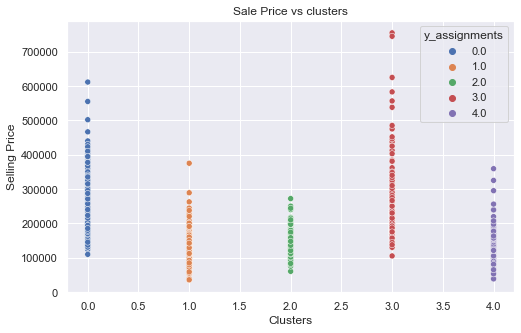

In [76]:
#Plot to show sale price vs 5 clusters
plt.figure(figsize=(8,5))
sns.scatterplot(data=assign,x='y_assignments',y = 'y', hue = "y_assignments",palette="deep")

plt.title("Sale Price vs clusters")
plt.xlabel("Clusters")
plt.ylabel("Selling Price")

plt.show()

In [77]:
# 4c: Compute the normalized mutual information (NMI) between your clustering results and the binned categories.

NMI_new = normalized_mutual_info_score(bins, labels)
nmi_score.append(NMI_new)
print("Normalized Mutual Information score with {} clusters :{}".format(k,NMI_new))

Normalized Mutual Information score with 5 clusters :0.21221029395430532


In [78]:
print("\t \t NMI SCORE COMPARISON")
print("------------------------------------------------------------------------------------")
print ("{:<40} |\t{:<20}\t|".format('NUMBER OF CLUSTERS','NMI SCORE'))
print("------------------------------------------------------------------------------------")  
combined = list(zip(cluster_list, nmi_score))

for nc, nm in combined:
    print("{:<40} |\t{:<20}\t|".format(nc, nm))
       

	 	 NMI SCORE COMPARISON
------------------------------------------------------------------------------------
NUMBER OF CLUSTERS                       |	NMI SCORE           	|
------------------------------------------------------------------------------------
10                                       |	0.18428804060392553 	|
3                                        |	0.28863032518077514 	|
5                                        |	0.21221029395430532 	|


# Observations:

##### Normalized Mutual Information (NMI) is a normalization of the Mutual Information (MI) score to scale the results between 0 (no mutual information) and 1 (perfect correlation).

##### Using NMI score we are determining the score of clustering
##### Low NMI shows that class members are mostly dispersed among various clusters.

##### NMI for the first clustering (0.184) is the lowest
##### It would mean we would prefer the clustering size 3
##### As number of clusters decreases, NMI score seems to improve










------------------------------------------------------------------------------------------------------------------------------

#### References:

https://pyclustering.github.io/docs/0.9.0/html/d0/dd3/classpyclustering_1_1cluster_1_1kmedoids_1_1kmedoids.html

https://medium.com/analytics-vidhya/gowers-distance-899f9c4bd553

https://scikit-learn.org/stable/modules/clustering.html

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.normalized_mutual_info_score.html

https://course.ccs.neu.edu/cs6140sp15/7_locality_cluster/Assignment-6/NMI.pdf
   